**CODSOFT**

**Task 01 - Titanic Survival Prediction**

**Akash Kokne - Data Science Intern**

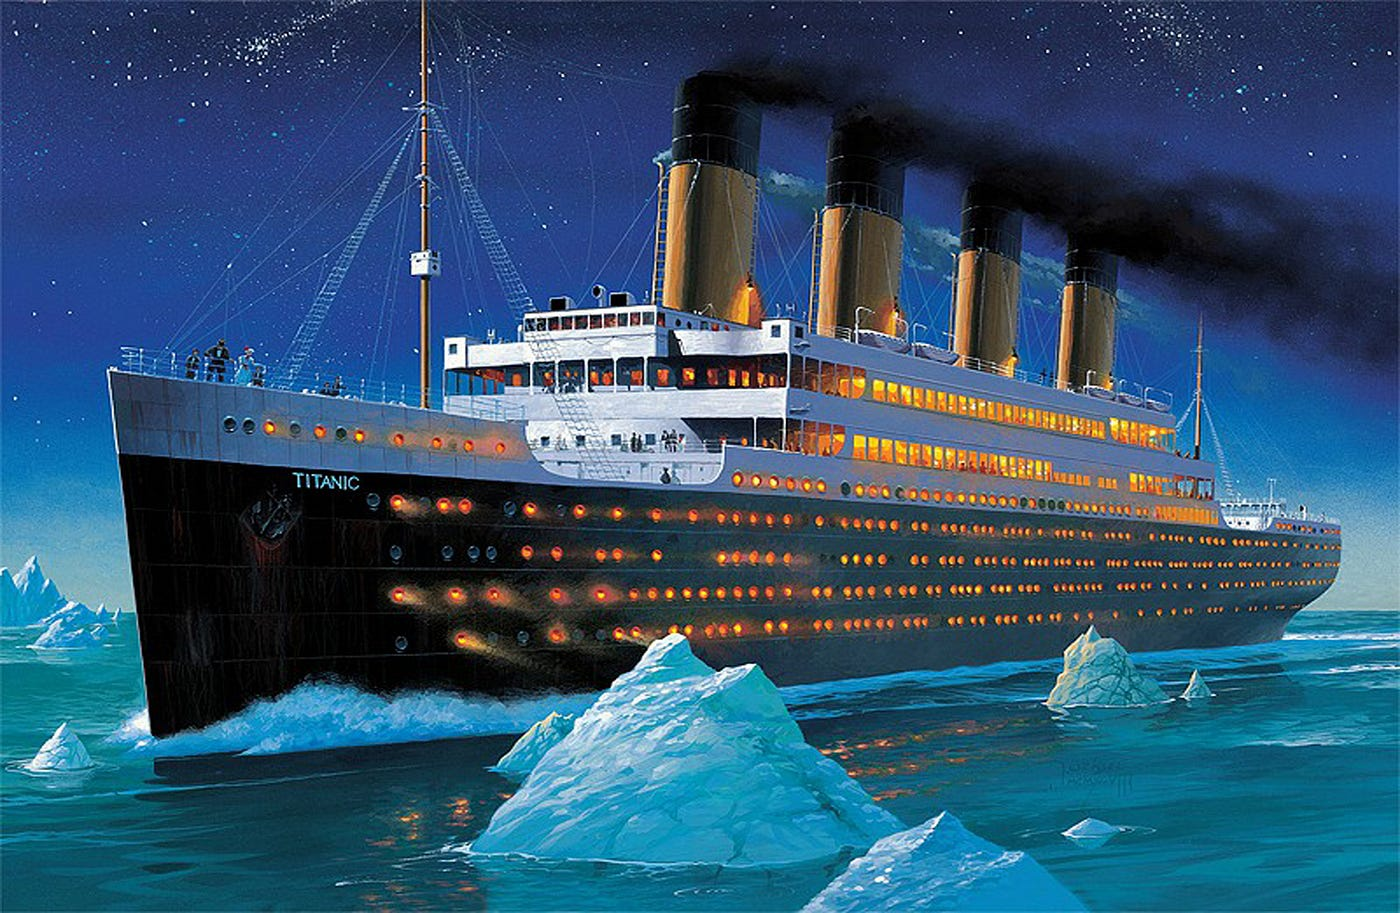

In this task, I have try to analysis of Titanic dataset & predict whether a Titanic passengers survived or not using given information about their sex, age, etc. 0 for not surviving, 1 for surviving. 

You can get this dataset from Kaggle, linked here - https://www.kaggle.com/datasets/brendan45774/test-file

In [1]:
#Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Now let’s read the data using the pandas data frame
df = pd.read_csv('tested.csv')
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [3]:
# To know number of columns and rows 
df.shape

(418, 12)

In [4]:
#To know the information about each column like the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


##### Features: The titanic dataset has roughly the following types of features:

Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority. 
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)

Binary: A subtype of categorical features, where the variable has only two categories. 
Eg: Sex (Male/Female)

Ordinal: They are similar to categorical features but they have an order(i.e can be sorted). 
Eg. Pclass (1, 2, 3)

Continuous: They can take up any value between the minimum and maximum values in a column. 
Eg. Age, Fare

Count: They represent the count of a variable. 
Eg. SibSp, Parch

Useless: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.

In [5]:
#Let’s see if there are any NULL values present in the dataset
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The columns having null values are: Age & Cabin. They need to be filled up with appropriate values later on.

In [6]:
df = df.drop(columns='Cabin', axis=1)

In [7]:
# filling nan values with mean and applying one hot encoding to sex column
df.fillna(df['Fare'].mean(), inplace=True)
df.fillna(df['Age'].mean(), inplace=True)

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   31.374254    0.447368   
std     120.810458    0.481622    0.841838   12.819048    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   32.000000    0.000000   
75%    1204.750000    1.000000    3.000000   35.906797    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200

In [10]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [11]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

### Data Visualization

##### Visualize the number of survivors and death counts.

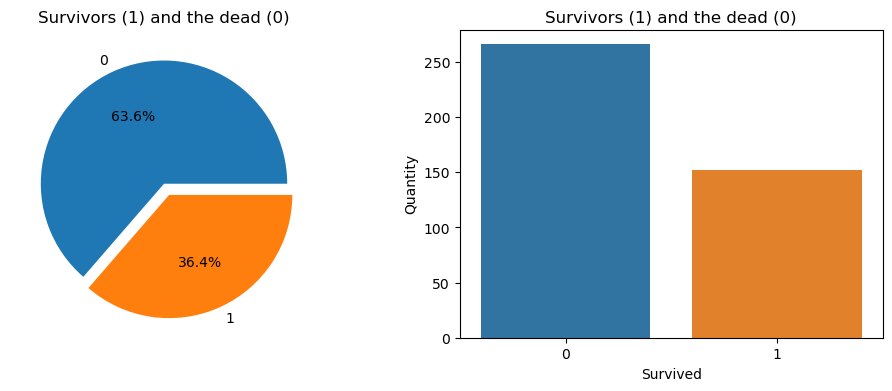

In [12]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survivors (1) and the dead (0)') 
ax[0].set_ylabel('') 
sns.countplot(x='Survived', data=df)
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)') 
plt.show()

##### Visualize the Sex feature

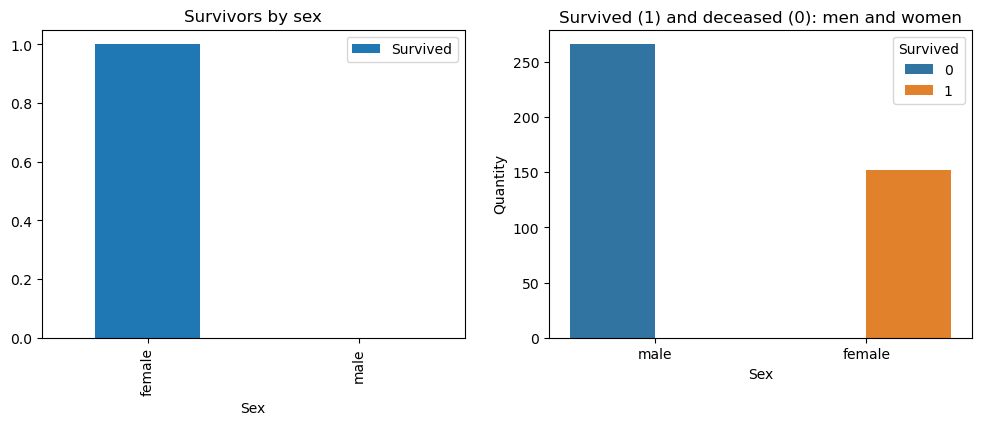

In [13]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
sns.countplot(x='Sex', hue='Survived', data=df)
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 
plt.show() 

<Axes: xlabel='Pclass', ylabel='count'>

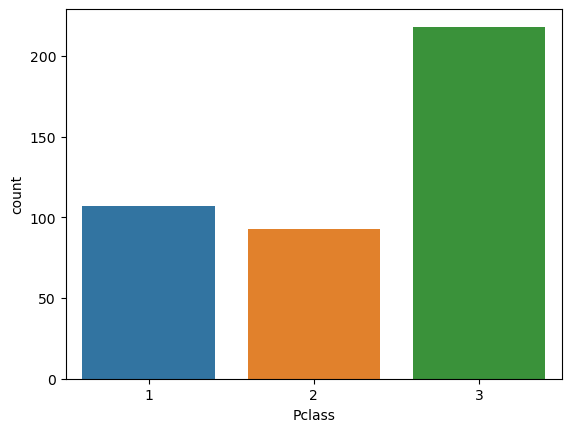

In [14]:
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

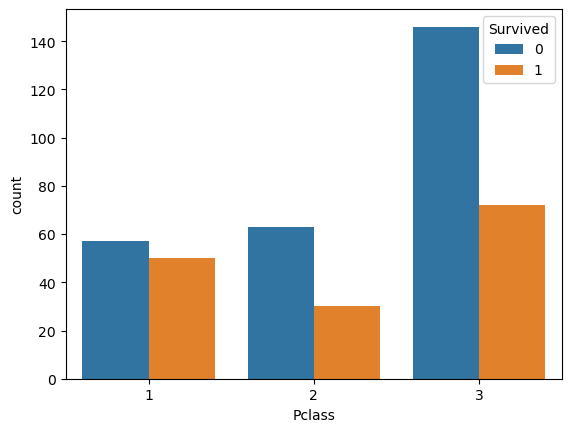

In [15]:
sns.countplot(x='Pclass', hue='Survived', data=df)

The least deaths are from Pclass = 1 and the highest number of deaths are from Pclass = 3
    
The dataset also have a high distribution of poeple from Pclass = 3, and high ratio of males
    
None of the male survived, and all the females survived
    
The highest death count is from Young Age Group, and Elderly People have a good survival count

Poeple with few family members are more likely to survive according to analysis
    
A high ratio of poeple who embarked from Queenstown survived, and Southampton has the highest death casualities.

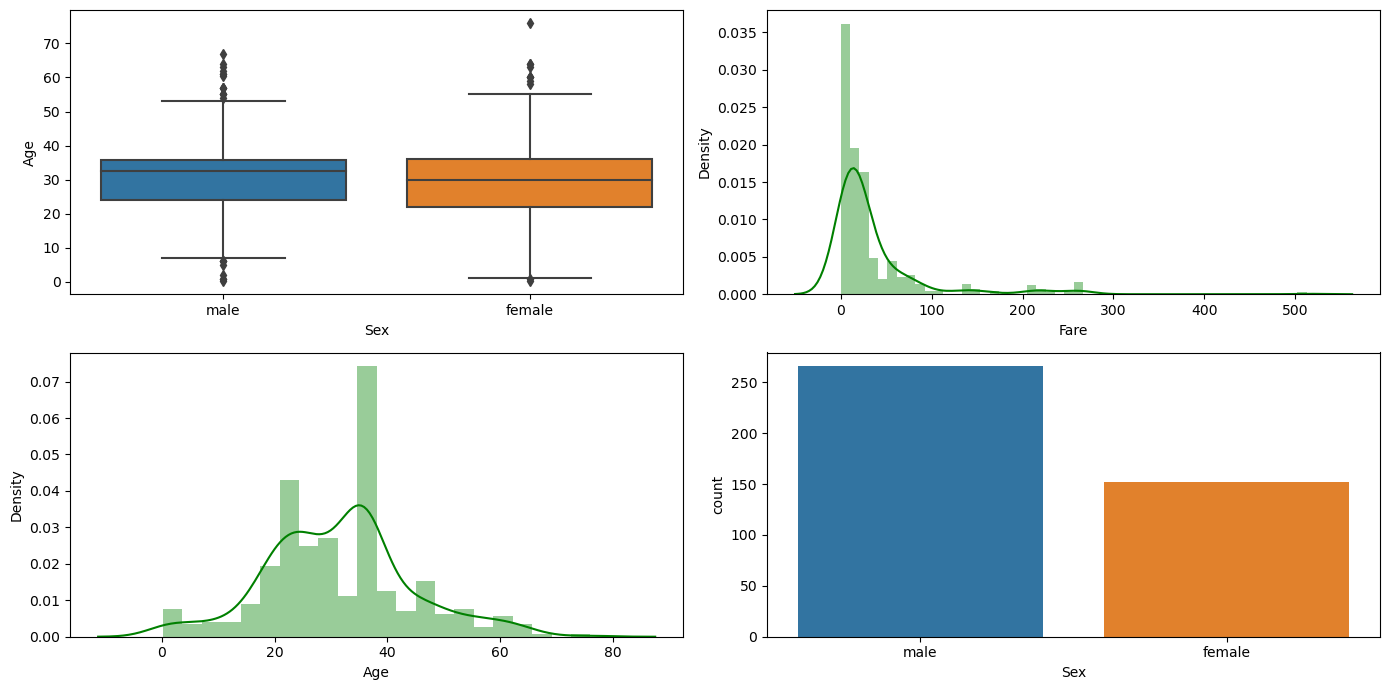

In [16]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)

plt.subplot(2,2,2)
sns.distplot(df['Fare'],color='g')

plt.subplot(2,2,3)
sns.distplot(df['Age'],color='g')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df)

plt.tight_layout()
plt.show()

In [17]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

### Encoding the categorical columns

In [18]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [19]:
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    0  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    1  47.0      1      0   
2                     Myles, Mr. Thomas Francis    0  62.0      0      0   
3                              Wirz, Mr. Albert    0  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.0      1      1   

    Ticket     Fare  Embarked  
0   330911   7.8292         2  
1   363272   7.0000         0  
2   240276   9.6875         2  
3   315154   8.6625         0  
4  3101298  12.2875         0

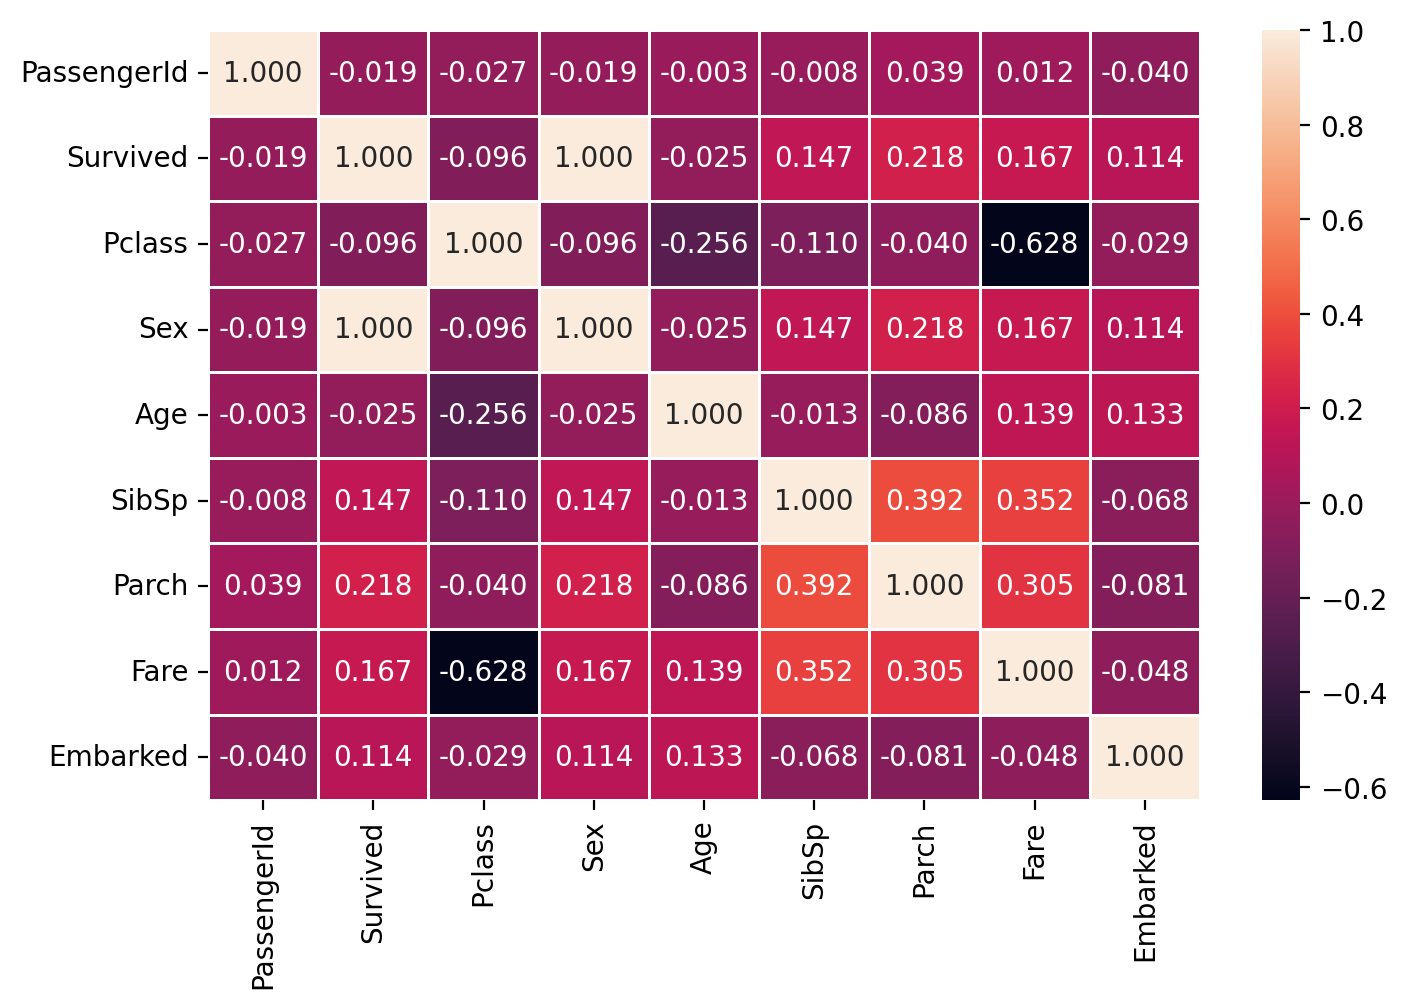

In [20]:
# Now check correlation of features
corr = df.corr(method = "kendall")
plt.figure(figsize=(8,5), dpi = 200)
sns.heatmap(corr, annot=True, fmt=".3f", linewidth=.5)
plt.show()

In [21]:
# Dropping non essential features
X = df.drop(columns=['Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']

### Model Training

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model Deployment

Now, I have simply deploy the various models with default parameters and see which one yields the best result. The models can further be tuned for better performance but are not in the scope.

In [23]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
#the confusion matrix of the model
lr_cm = confusion_matrix(y_test,lr_pred)
#the accuracy score of the model
lr_acc = accuracy_score(y_test,lr_pred)
print(f'The confusion matrix is:\n{lr_cm}\nThe accuracy is: {lr_acc*100}%')

The confusion matrix is:
[[50  0]
 [ 0 34]]
The accuracy is: 100.0%


In [24]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
#the confusion matrix of the model
dtc_cm = confusion_matrix(y_test,dtc_pred)
#the accuracy score of the model
dtc_acc = accuracy_score(y_test,dtc_pred)
print(f'The confusion matrix is:\n{dtc_cm}\nThe accuracy is: {dtc_acc*100}%')

The confusion matrix is:
[[50  0]
 [ 0 34]]
The accuracy is: 100.0%


In [25]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
#the confusion matrix of the model
rfc_cm = confusion_matrix(y_test,rfc_pred)
#the accuracy score of the model
rfc_acc = accuracy_score(y_test,rfc_pred)
print(f'The confusion matrix is:\n{rfc_cm}\nThe accuracy is: {rfc_acc*100}%')

The confusion matrix is:
[[50  0]
 [ 0 34]]
The accuracy is: 100.0%


In [26]:
# K-Neighbhors algorithm Model 
#here kept value of k in a loop to get an optimum value with least misclassified data
from sklearn.neighbors import KNeighborsClassifier
missclassified=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    missclassified.append((y_test != knn_pred).sum())
print(missclassified)

[33, 34, 28, 31, 33, 31, 32, 34, 30, 31, 31, 32, 32, 30, 30, 31, 31, 33, 31]


In [27]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
#the confusion matrix of the model
knn_cm = confusion_matrix(y_test,knn_pred)
#the accuracy score of the model
knn_acc = accuracy_score(y_test,knn_pred)
print(f'The confusion matrix is:\n{knn_cm}\nThe accuracy is: {round((knn_acc*100), 2)}%')

The confusion matrix is:
[[46  4]
 [27  7]]
The accuracy is: 63.1%


In [28]:
# Support Vector Machine Model
from sklearn.svm import SVC
svm = SVC(kernel='linear',random_state=12)
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
#the confusion matrix of the model
svm_cm = confusion_matrix(y_test,svm_pred)
#the accuracy score of the model
svm_acc = accuracy_score(y_test,svm_pred)
print(f'The confusion matrix is:\n{svm_cm}\nThe accuracy is: {svm_acc*100}%')

The confusion matrix is:
[[50  0]
 [ 0 34]]
The accuracy is: 100.0%


In [ ]:
# Naives Bayes-Gaussian Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
#the confusion matrix of the model
nb_cm = confusion_matrix(y_test,nb_pred)
#the accuracy score of the model
nb_acc = accuracy_score(y_test,nb_pred)
print(f'The confusion matrix is:\n{nb_cm}\nThe accuracy is: {nb_acc*100}%')

Here, the accuracy of the models are:

Logistic regression: 100%

Decision Tree Classifier: 100%

Random Forest Classifier: 100%

K-Nearest Neighbour: 63.1%

Support Vector Machine: 100%

Naives Bayes Gaussian: 100%

As you can see we get 100% accuracy with all our models its because of slight imbalance of data, but the K-Nearest Neighbour has accuracy of  63.1%.

** **Thank You** **